In [61]:
import numpy as np
from datetime import datetime, timedelta
from pyproj import Proj
import pyproj
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyresample import image, geometry
import sys
import metpy
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd
import statsmodels.api as sm
import os
import os.path as op
DATAPATH= '/goesdata/'
%matplotlib inline

In [71]:
G16 = xr.open_dataset('/sharedData/scratch/OR_ABI-L1b-RadF-M6C07_G16_s20191030000200_e20191030009519_c20191030009557.nc') 
#using metpy for reading satellite or weather data
G17 = xr.open_dataset('/sharedData/scratch/OR_ABI-L1b-RadF-M6C07_G17_s20191030000339_e20191030009417_c20191030009441.nc') 
#

In [72]:


g16_band7 = G16['Rad']
g17_band7 = G17['Rad']


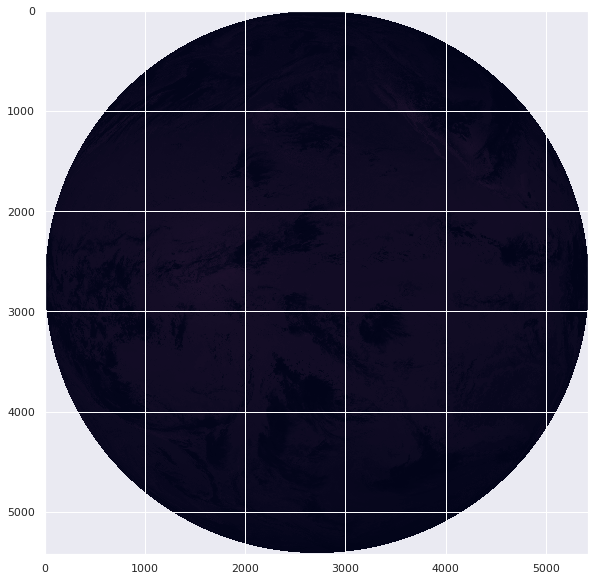

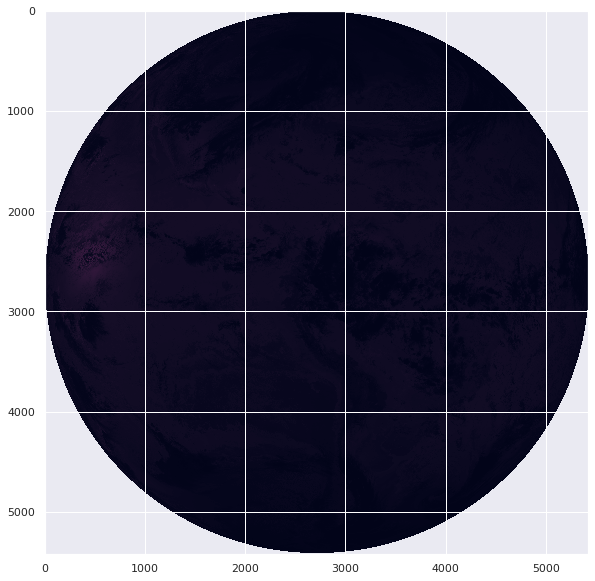

In [73]:
fig_1, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.imshow(g17_band7)
plt.savefig('..'+ op.join(DATAPATH,"Sanity_Check/Striping_Issue/M6C07_G17_04_13_19-0000.png"))
fig_1, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.imshow(g16_band7)
plt.savefig('..'+ op.join(DATAPATH,"Sanity_Check/Striping_Issue/M6C07_G16_04_13_19-0000.png"))

In [74]:

dat16 = G16.metpy.parse_cf('Rad')
dat17 = G17.metpy.parse_cf('Rad')


In [75]:
geos16 = dat16.metpy.cartopy_crs
geos17 = dat17.metpy.cartopy_crs


In [76]:
x16= dat16.x
y16 = dat16.y

# Cartopy extents go [x_min, x_max, y_min, y_max]
cartopy_extent_goes16 = (x16.min(), x16.max(), y16.min(), y16.max())
pyresample_extent_goes16 = [float(x16.min()), float(y16.min()), float(x16.max()), float(y16.max())]


x17 = dat17.x
y17 = dat17.y

# Cartopy extents go [x_min, x_max, y_min, y_max]
cartopy_extent_goes17 = (x17.min(), x17.max(), y17.min(), y17.max())
pyresample_extent_goes17 = [float(x17.min()), float(y17.min()), float(x17.max()), float(y17.max())]


Text(0.5, 1.0, 'GOES-17')

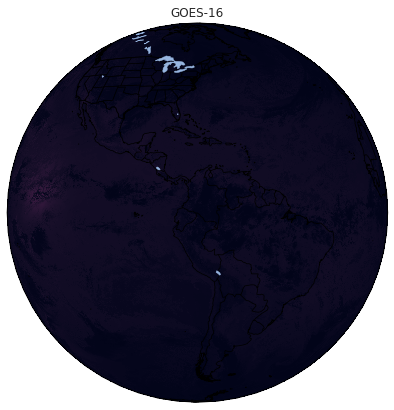

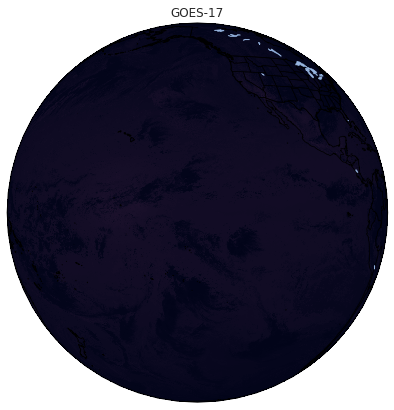

In [77]:
fig_2 = plt.figure(figsize=(15, 8))

ax1_2 = fig_2.add_subplot(1, 2, 1, projection=geos16)


## GOES 16
ax1_2.imshow(g16_band7, origin='upper', extent=cartopy_extent_goes16,
           transform=geos16)
ax1_2.coastlines(resolution='50m', color='black', linewidth=.75)
ax1_2.add_feature(ccrs.cartopy.feature.BORDERS, linewidth=.75)
ax1_2.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax1_2.add_feature(ccrs.cartopy.feature.LAKES, linewidth=.5)
ax1_2.set_title('GOES-16')

#-----
fig_2 = plt.figure(figsize=(15, 8))

ax2_2 = fig_2.add_subplot(1, 2, 2, projection=geos17)


## GOES 17
ax2_2.imshow(g17_band7, origin='upper', extent=cartopy_extent_goes17,
           transform=geos17)
ax2_2.coastlines(resolution='50m', color='black', linewidth=.75)
ax2_2.add_feature(ccrs.cartopy.feature.BORDERS, linewidth=.75)
ax2_2.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax2_2.add_feature(ccrs.cartopy.feature.LAKES, linewidth=.5)
ax2_2.set_title('GOES-17')
#


In [78]:
pc = ccrs.PlateCarree()
mc = ccrs.Mercator()

big_box_extent_pc_cartopy = [-116, -95, -10, 10]
big_box_extent_mc = mc.transform_points(pc, 
                    np.array(big_box_extent_pc_cartopy[:2]),
                    np.array(big_box_extent_pc_cartopy[2:])).ravel()
big_box_extent_mc_cartopy = [
    big_box_extent_mc[0],
    big_box_extent_mc[3],
    big_box_extent_mc[1],
    big_box_extent_mc[4]
]
roi_extent_pc_cartopy = [-109.59326, -102.40674, 
                          8.94659, -8.94656]
roi_extent_mc = mc.transform_points(pc, 
                    np.array(roi_extent_pc_cartopy[:2]),
                    np.array(roi_extent_pc_cartopy[2:])).ravel()
roi_extent_mc_cartopy = [
    roi_extent_mc[0],
    roi_extent_mc[3],
    roi_extent_mc[1],
    roi_extent_mc[4]
]
roi_extent_mc_pyresample = [
    roi_extent_mc[0],
    roi_extent_mc[1],
    roi_extent_mc[3],
    roi_extent_mc[4]
]
print(big_box_extent_mc_cartopy)
print(roi_extent_mc_cartopy)

[-12913060.932019735, -10575351.62536099, -1111475.102852225, 1111475.1028522244]
[-12199865.897574836, -11399866.150599161, 993361.388724224, -993358.0300969948]


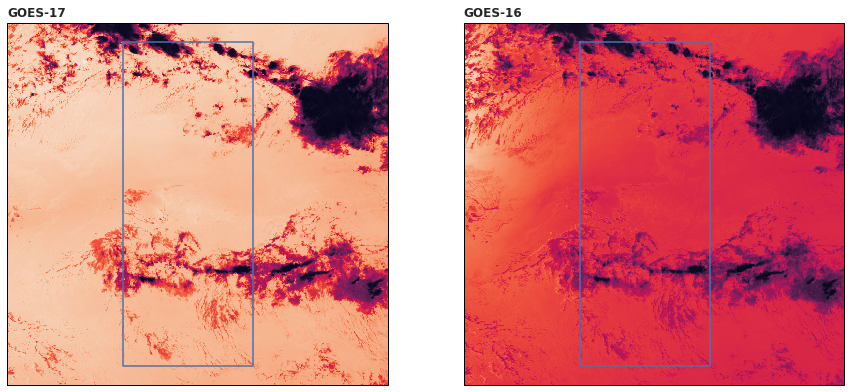

In [79]:

#-----
fig_3 = plt.figure(figsize=(15, 8))

ax_3 = fig_3.add_subplot(1, 2, 1, projection=mc)

ax_3.set_extent(big_box_extent_mc_cartopy, crs=mc)

ax_4 = fig_3.add_subplot(1, 2, 2, projection=mc)

ax_4.set_extent(big_box_extent_mc_cartopy, crs=mc)

roi_x = [roi_extent_mc_cartopy[0], 
         roi_extent_mc_cartopy[1],
         roi_extent_mc_cartopy[1],
         roi_extent_mc_cartopy[0],
         roi_extent_mc_cartopy[0]]

roi_y = [roi_extent_mc_cartopy[2], 
         roi_extent_mc_cartopy[2],
         roi_extent_mc_cartopy[3],
         roi_extent_mc_cartopy[3],
         roi_extent_mc_cartopy[2]]

# GOES16
ax_4.imshow(g16_band7, origin='upper',
           extent=cartopy_extent_goes16,
           transform=geos16,
           interpolation='none')
ax_4.add_feature(ccrs.cartopy.feature.STATES)
ax_4.coastlines(resolution='50m', color='black', linewidth=.75)
ax_4.add_feature(ccrs.cartopy.feature.BORDERS, linewidth=.75)
ax_4.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax_4.add_feature(ccrs.cartopy.feature.LAKES, linewidth=.5)
ax_4.set_title('GOES-16', loc='left', fontweight='bold')
ax_4.plot(roi_x, roi_y,'b-')

# GOES17
ax_3.imshow(g17_band7, origin='upper',
           extent=cartopy_extent_goes17,
           transform=geos17,
           interpolation='none')
ax_3.add_feature(ccrs.cartopy.feature.STATES)
ax_3.coastlines(resolution='50m', color='black', linewidth=.75)
ax_3.add_feature(ccrs.cartopy.feature.BORDERS, linewidth=.75)
ax_3.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax_3.add_feature(ccrs.cartopy.feature.LAKES, linewidth=.5)
ax_3.set_title('GOES-17', loc='left', fontweight='bold')
ax_3.plot(roi_x, roi_y,'b-')
plt.savefig('..'+ op.join(DATAPATH,"Sanity_Check/Striping_Issue/ROI_M6C07_04_13_19-0000.png"))

In [80]:
g17_band7_ma = np.ma.masked_array(g17_band7)
g16_band7_ma = np.ma.masked_array(g16_band7)

In [81]:
goes17_params = geos17.proj4_params
goes17_area = geometry.AreaDefinition('GOES-17', 'Full Disk',
                                'GOES-17', goes17_params,
                             g17_band7.shape[1], g17_band7.shape[0],
                              pyresample_extent_goes17)
area_mc_def = geometry.AreaDefinition('areaTest', 'Equator-ROW', 'areaTest',
                                  mc.proj4_params,
                                    1001, 401,
                                   roi_extent_mc_pyresample)
geos17_con_nn = image.ImageContainerNearest(g17_band7_ma, 
                                            goes17_area, 
                                            radius_of_influence=50000)

# Here we are using pyresample for the remapping
area_mc_con_nn = geos17_con_nn.resample(area_mc_def)
image_mc_17 = area_mc_con_nn.image_data

#------
goes16_params = geos16.proj4_params
goes16_area = geometry.AreaDefinition('GOES-16', 'Full Disk',
                                'GOES-16', goes16_params,
                             g16_band7.shape[1], g16_band7.shape[0],
                              pyresample_extent_goes16)
area_mc_def = geometry.AreaDefinition('areaTest', 'Equator-ROW', 'areaTest',
                                  mc.proj4_params,
                                    1001, 401,
                                   roi_extent_mc_pyresample)
geos16_con_nn = image.ImageContainerNearest(g16_band7_ma, 
                                            goes16_area, 
                                            radius_of_influence=50000)

# Here we are using pyresample for the remapping
area_mc_con_nn = geos16_con_nn.resample(area_mc_def)
image_mc_16 = area_mc_con_nn.image_data

Text(0.0, 1.0, 'GOES-16')

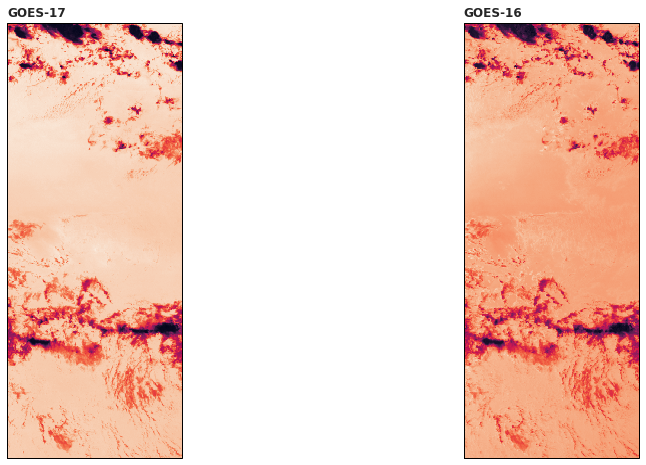

In [82]:
fig_4 = plt.figure(figsize=(15, 8))

ax_5 = fig_4.add_subplot(1, 2, 1, projection=mc)

ax_5.set_extent(roi_extent_mc_cartopy, crs=mc)

ax_6 = fig_4.add_subplot(1, 2, 2, projection=mc)

ax_6.set_extent(roi_extent_mc_cartopy, crs=mc)

# GOES17
ax_5.imshow(image_mc_17, origin='upper',
           extent=roi_extent_mc_cartopy,
           transform=mc,
           interpolation='none')
ax_5.set_title('GOES-17', loc='left', fontweight='bold')

# GOES16
ax_6.imshow(image_mc_16, origin='upper',
           extent=roi_extent_mc_cartopy,
           transform=mc,
           interpolation='none')
ax_6.set_title('GOES-16', loc='left', fontweight='bold')


In [83]:
print('mean_17: ',image_mc_17.mean())
print('std_17: ',image_mc_17.std())

print('mean_16: ',image_mc_16.mean())
print('std_16: ',image_mc_16.std())

mean_17:  0.7626824
std_17:  0.1449186
mean_16:  0.81380737
std_16:  0.14385012


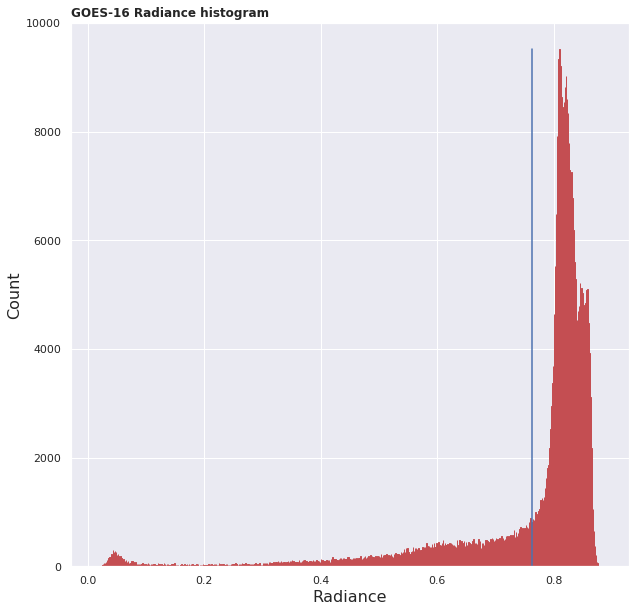

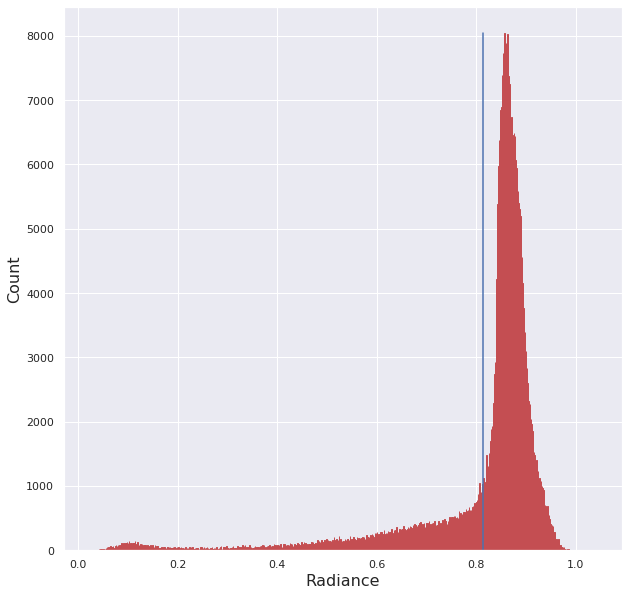

In [89]:
fig_5, ax_7 = plt.subplots(figsize=(10, 10))
values = np.array(image_mc_17).ravel()
counts, bins, _ = ax_7.hist(values,bins=1024,histtype='bar',
           color='r',fc='r',ec='r')
ax_7.set_title('GOES-17 Radiance histogram', loc='left', fontweight='bold')
_ = ax_7.set_ylabel('Count',fontsize = 16)
_ = ax_7.set_xlabel('Radiance',fontsize = 16)
_=ax_7.plot([values.mean(),values.mean()],[0,counts.max()],c='b')
plt.savefig('..'+ op.join(DATAPATH,"Histograms/M6C07_G17_04_13_19-0000.png"))


fig_6, ax_8 = plt.subplots(figsize=(10, 10))
values = np.array(image_mc_16).ravel()
counts, bins, _ = ax_8.hist(values,bins=1024,histtype='bar',
           color='r',fc='r',ec='r')
ax_7.set_title('GOES-16 Radiance histogram', loc='left', fontweight='bold')
_ = ax_8.set_ylabel('Count',fontsize = 16)
_ = ax_8.set_xlabel('Radiance',fontsize = 16)
_=ax_8.plot([values.mean(),values.mean()],[0,counts.max()],c='b')
plt.savefig('..'+ op.join(DATAPATH,"Histograms/M6C07_G16_04_13_19-0000.png"))

In [90]:
counts_17, bins_17, _ = ax_7.hist(values,bins=1024,histtype='bar',
           color='r',fc='r',ec='r')

counts_16, bins_16, _ = ax_8.hist(values,bins=1024,histtype='bar',
           color='r',fc='r',ec='r')

In [91]:
print('count 17:',counts_17)

print('count 16:',counts_16)

count 17: [6. 0. 0. ... 0. 0. 4.]
count 16: [6. 0. 0. ... 0. 0. 4.]
